# Tokenization

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

- Why can't LLM spell words? **Tokenization**.
- Why can't LLM do super simple string processing tasks like reversing a string? **Tokenization**.
- Why is LLM worse at non-English languages (e.g. Japanese)? **Tokenization**.
- Why is LLM bad at simple arithmetic? **Tokenization**.
- Why did GPT-2 have more than necessary trouble coding in Python? **Tokenization**.
- Why did my LLM abruptly halt when it sees the string "<|endoftext|>"? **Tokenization**.
- What is this weird warning I get about a "trailing whitespace"? **Tokenization**.
- Why the LLM break if I ask it about "SolidGoldMagikarp"? **Tokenization**.
- Why should I prefer to use YAML over JSON with LLMs? **Tokenization**.
- Why is LLM not actually end-to-end language modeling? **Tokenization**.
- What is the real root of suffering? **Tokenization**.

---

Good tokenization web app: [https://tiktokenizer.vercel.app](https://tiktokenizer.vercel.app)

Example string:

```
Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

127 + 677 = 804
1275 + 6773 = 8041

Egg.
I have an Egg.
egg.
EGG.

만나서 반가워요. 저는 OpenAI에서 개발한 대규모 언어 모델인 ChatGPT입니다. 궁금한 것이 있으시면 무엇이든 물어보세요.

for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
```

---

Much glory awaits someone who can delete the need for tokenization. But meanwhile, let's learn about it.


In [1]:
"안녕하세요 👋 (hello in Korean!)"

'안녕하세요 👋 (hello in Korean!)'

### Generating Unicode code points

In [2]:
[ord(x)for x in "안녕하세요 👋 (hello in Korean!)"]

[50504,
 45397,
 54616,
 49464,
 50836,
 32,
 128075,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

### Encoding Unicode Text: UTF-8

In [3]:
list("안녕하세요 👋 (hello in Korean!)".encode("utf-8"))

[236,
 149,
 136,
 235,
 133,
 149,
 237,
 149,
 152,
 236,
 132,
 184,
 236,
 154,
 148,
 32,
 240,
 159,
 145,
 139,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

Unicode and UTF (Unicode Transformation Format) are related but serve different purposes:

Unicode:

Unicode is a standard that assigns a unique numeric code point to every character and symbol in every writing system used by humanity.
It provides a consistent way to represent and manipulate text data from any writing system in the world.
For example, 'A' is represented by the code point U+0041.
UTF (Unicode Transformation Format):

UTF is a family of encoding schemes that map Unicode code points to byte sequences for storage or transmission.
UTF-8, UTF-16, and UTF-32 are different encoding schemes under the UTF family, each using different methods to encode Unicode characters into bytes.
UTF-8 is particularly popular because it efficiently handles ASCII characters (which are a subset of Unicode) while also supporting the entire Unicode character set.
Reasons for Using UTF Encoding Over Direct Unicode Code Points:

Compatibility and Efficiency:

Encoding text as UTF-8 or other UTF variants allows for efficient storage and transmission of text data, especially over networks or in storage systems that operate with byte-oriented data.
UTF encoding ensures that Unicode characters are represented correctly and efficiently across different systems and platforms.
Interoperability:

Many software systems and protocols expect text data to be encoded in UTF formats. Encoding text as UTF ensures compatibility and interoperability with these systems.
Variable Length Encoding:

UTF-8, for instance, uses a variable-length encoding scheme where ASCII characters (which are single-byte in UTF-8) and other Unicode characters (which may require multiple bytes) are efficiently represented.
This allows UTF-8 to be compact when dealing with predominantly ASCII text while still supporting the entire Unicode character set.
In essence, while Unicode provides a standard for defining and identifying characters, UTF encoding schemes provide a way to efficiently store and transmit text data based on Unicode standards. Using UTF over direct Unicode code points ensures that text data is handled efficiently, accurately, and compatibly across diverse computing environments.

## Building a Byte Pair Encoding (BPE) Tokenizer

The BPE algorithm is relatively straightforward to implement. The example code provided demonstrates building a simple BPE tokenizer in Python. It covers the following functions:

In [4]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."

In [5]:
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [6]:
print(text)
print("length:", len(text))

Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533


In [7]:
print(tokens)
print("length:", len(tokens))

[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 101, 32, 118, 101, 114, 121, 32, 110, 97, 109, 101, 32, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 101, 32, 105, 110, 116, 111, 32, 116, 104, 101, 32, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 101, 32, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 101, 32, 111, 117, 103, 104, 116, 32, 116

1. Identify most frequent pair: Analyze the sequence and identify the most frequently occurring pair of bytes

In [8]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

In [9]:
stats = get_stats(tokens)
print(stats)

{(239, 188): 1, (188, 181): 1, (181, 239): 1, (239, 189): 6, (189, 142): 1, (142, 239): 1, (189, 137): 1, (137, 239): 1, (189, 131): 1, (131, 239): 1, (189, 143): 1, (143, 239): 1, (189, 132): 1, (132, 239): 1, (189, 133): 1, (133, 33): 1, (33, 32): 2, (32, 240): 3, (240, 159): 15, (159, 133): 7, (133, 164): 1, (164, 240): 1, (133, 157): 1, (157, 240): 1, (133, 152): 1, (152, 240): 1, (133, 146): 1, (146, 240): 1, (133, 158): 1, (158, 240): 1, (133, 147): 1, (147, 240): 1, (133, 148): 1, (148, 226): 1, (226, 128): 12, (128, 189): 1, (189, 32): 1, (159, 135): 7, (135, 186): 1, (186, 226): 1, (128, 140): 6, (140, 240): 6, (135, 179): 1, (179, 226): 1, (135, 174): 1, (174, 226): 1, (135, 168): 1, (168, 226): 1, (135, 180): 1, (180, 226): 1, (135, 169): 1, (169, 226): 1, (135, 170): 1, (170, 33): 1, (159, 152): 1, (152, 132): 1, (132, 32): 1, (32, 84): 1, (84, 104): 1, (104, 101): 6, (101, 32): 20, (32, 118): 1, (118, 101): 3, (101, 114): 6, (114, 121): 2, (121, 32): 2, (32, 110): 2, (110,

In [10]:
print(sorted(((v,k) for k,v in stats.items()), reverse=True))

[(20, (101, 32)), (15, (240, 159)), (12, (226, 128)), (12, (105, 110)), (10, (115, 32)), (10, (97, 110)), (10, (32, 97)), (9, (32, 116)), (8, (116, 104)), (7, (159, 135)), (7, (159, 133)), (7, (97, 114)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (6, (116, 32)), (6, (114, 32)), (6, (111, 114)), (6, (110, 103)), (6, (110, 100)), (6, (109, 101)), (6, (104, 101)), (6, (101, 114)), (6, (32, 105)), (5, (117, 115)), (5, (115, 116)), (5, (110, 32)), (5, (100, 101)), (5, (44, 32)), (5, (32, 115)), (4, (116, 105)), (4, (116, 101)), (4, (115, 44)), (4, (114, 105)), (4, (111, 117)), (4, (111, 100)), (4, (110, 116)), (4, (110, 105)), (4, (105, 99)), (4, (104, 97)), (4, (103, 32)), (4, (101, 97)), (4, (100, 32)), (4, (99, 111)), (4, (97, 109)), (4, (85, 110)), (4, (32, 119)), (4, (32, 111)), (4, (32, 102)), (4, (32, 85)), (3, (118, 101)), (3, (116, 115)), (3, (116, 114)), (3, (116, 111)), (3, (114, 116)), (3, (114, 115)), (3, (114, 101)), (3, (111, 102)), (3, (111, 32)), (3, (108, 108)), (

In [11]:
top_pair = max(stats, key=stats.get)
top_pair

(101, 32)

In [12]:
chr(101), chr(32)

('e', ' ')

So most of the words end with 'e' and ' '.

2. Mint a new token: Create a new token to represent this pair and add it to the vocabulary. Most frequent pair will be assigned to 256 as the integers that represent characters from 0 - 255.
3. Replace occurrences: Replace all instances of the frequent pair with the new token

In [13]:
def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

In [14]:
# Example
print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99))

[5, 6, 99, 9, 1]


In [15]:
tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length:", len(tokens2))

[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 32, 226, 128, 156

In the context of the given code, the number `256` is used as a new token to replace pairs of consecutive bytes found in the `tokens` list. Here’s a detailed explanation of why `256` is chosen:

### Understanding Byte Range

- The `tokens` list consists of integers in the range `0..255`, which represent byte values of the encoded UTF-8 text.
- UTF-8 encoding represents each character as one or more bytes, where each byte is a value between `0` and `255`.

### Why 256?

- **New Token Identifier**: 
  - Since all current tokens are in the range `0..255`, using `256` as the new token identifier ensures that the new token is unique and does not overlap with existing byte values.
  - The value `256` is the smallest integer outside the range of valid byte values (`0..255`), making it an ideal choice for a new token.

- **Extension Beyond Byte Range**:
  - By choosing `256`, the code can easily identify and differentiate merged pairs from original bytes.
  - This approach allows for expanding the token vocabulary beyond the original byte range.

### Detailed Example

Let’s illustrate with an example:

1. **Initial Encoding and Tokenization**:
   - Text: `"Ｕｎｉｃｏｄｅ!"`
   - UTF-8 encoded bytes: `[239, 189, 172, 110, 105, 99, 111, 100, 101, 33]` (hypothetical example)
   - These bytes are converted to a list of integers, which remain the same: `[239, 189, 172, 110, 105, 99, 111, 100, 101, 33]`

2. **Finding Most Frequent Pair**:
   - Assume the most frequent pair is `(110, 105)` (representing 'n' and 'i').
   - This pair occurs once in this example.

3. **Merging the Pair**:
   - Replace all occurrences of `(110, 105)` with `256`.
   - The updated tokens list becomes: `[239, 189, 172, 256, 99, 111, 100, 101, 33]`

By using `256`, the function can continue to replace additional pairs in further iterations without conflicts with the original byte values. Each subsequent pair replacement would use a new, unique identifier (`257`, `258`, etc.) to ensure clarity and prevent overlap with existing tokens.

### Summary

Using `256` as the replacement token allows the algorithm to clearly distinguish newly created tokens from the original byte values, facilitating further processing and ensuring that the replacements do not conflict with existing data. This method is essential for effectively implementing the Byte Pair Encoding (BPE) algorithm.

4. Repeat: Repeat steps 1-3 until reaching a desired vocabulary size.

In [16]:
with open('blog-unicode.txt') as f:
    text = f.read()

In [17]:
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [18]:
vocab_size = 276 # the desired final vocabulary size - This is a hyperparameter and we need to choose it after couple of iterations as per the desired performance.
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

In [19]:
merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (101, 32) into a new token 256
merging (105, 110) into a new token 257
merging (115, 32) into a new token 258
merging (116, 104) into a new token 259


merging (101, 114) into a new token 260
merging (99, 111) into a new token 261
merging (116, 32) into a new token 262
merging (226, 128) into a new token 263
merging (44, 32) into a new token 264
merging (97, 110) into a new token 265
merging (111, 114) into a new token 266
merging (100, 32) into a new token 267
merging (97, 114) into a new token 268
merging (101, 110) into a new token 269
merging (257, 103) into a new token 270
merging (261, 100) into a new token 271
merging (121, 32) into a new token 272
merging (46, 32) into a new token 273
merging (97, 108) into a new token 274
merging (259, 256) into a new token 275


In [20]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 24636
ids length: 19484
compression ratio: 1.26X


Note, the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

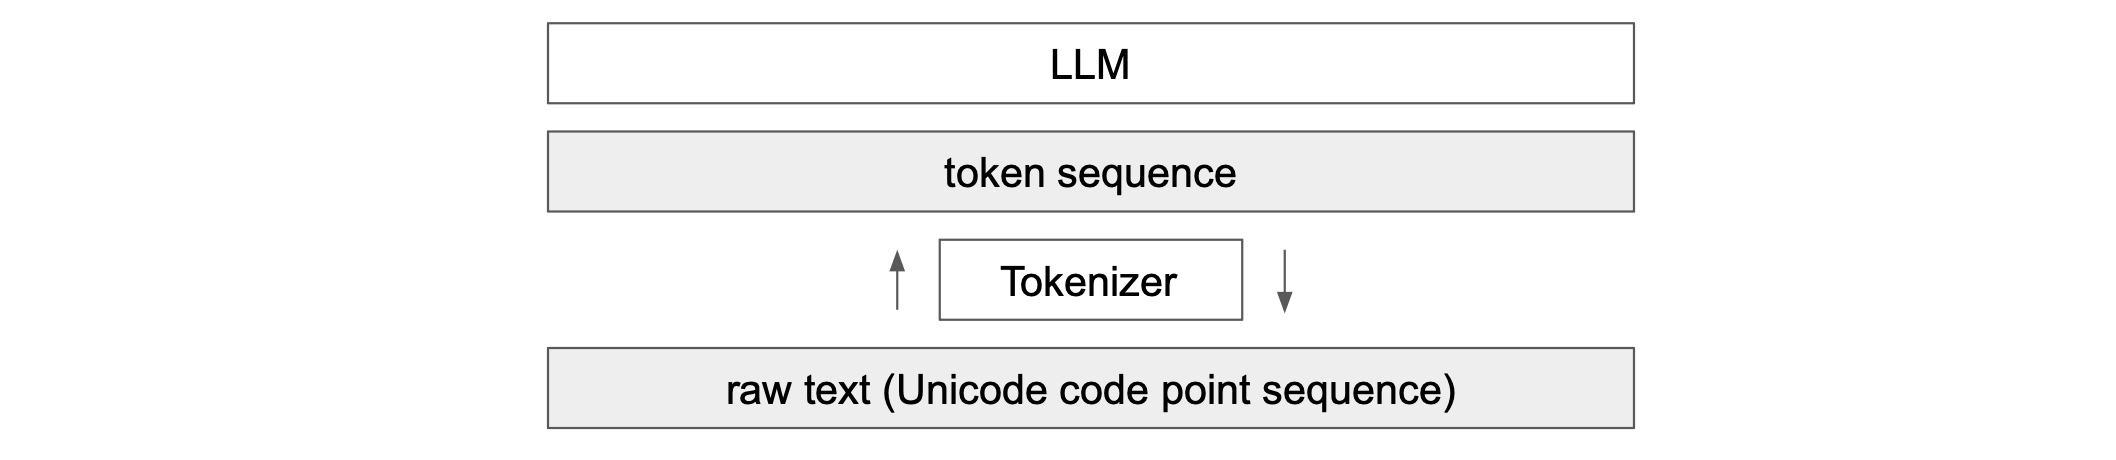

**decoding**

Given a sequence of integers in the range [0, vocab_size], what is the text?

In [21]:
vocab = {idx: bytes([idx]) for idx in range(256)}

In [26]:
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

In [30]:
def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  text = tokens.decode("utf-8", errors="replace")
  return text

print(decode([128]))

�


**encoding**

The other way around: Given a string, what are the tokens?

In [31]:
merges

{(101, 32): 256,
 (105, 110): 257,
 (115, 32): 258,
 (116, 104): 259,
 (101, 114): 260,
 (99, 111): 261,
 (116, 32): 262,
 (226, 128): 263,
 (44, 32): 264,
 (97, 110): 265,
 (111, 114): 266,
 (100, 32): 267,
 (97, 114): 268,
 (101, 110): 269,
 (257, 103): 270,
 (261, 100): 271,
 (121, 32): 272,
 (46, 32): 273,
 (97, 108): 274,
 (259, 256): 275}

In [32]:
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode(""))

[]


In [33]:
print(decode(encode("hello world")))

hello world


In [34]:
text2 = decode(encode(text))
print(text2 == text)

True


In [35]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True
